<a href="https://colab.research.google.com/github/Ishita2502/Muffin/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

MessageError: ignored

IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2) #for visuals
%matplotlib inline

IMPORT DATA

In [ ]:
path='/gdrive/My Drive/Online MLCC : Oct 2021/Data/Classwork/'

In [ ]:
recipes=pd.read_csv(path+'recipes_muffins_cupcake.csv')
recipes.head()

,Type,Flour,Sugar
0,Muffin,55,3
1,Muffin,47,12
2,Muffin,47,18
3,Muffin,45,17
4,Muffin,50,12


PREPARE DATA

In [ ]:
#feature names
recipe_features=recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Sugar']

In [ ]:
from sklearn.preprocessing import LabelEncoder

recipe_type_encoder=LabelEncoder()

recipes['Type']=recipe_type_encoder.fit_transform(recipes['Type'])
recipes.head()

,Type,Flour,Sugar
0,1,55,3
1,1,47,12
2,1,47,18
3,1,45,17
4,1,50,12


In [ ]:
#specify inputs for the model
x=recipes[['Flour','Sugar']]
x.head()


,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12


In [ ]:
y=recipes['Type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=1000)

model.fit(x,y)

LogisticRegression(max_iter=1000)

In [ ]:
theta_0 = model.intercept_[0]
print('theta 0 = {}'.format(theta_0))

theta 0 = -39.15124062620957


In [ ]:
theta=model.coef_[0]
print('theta 1 = {},theta 2 = {}'.format(theta[0],theta[1]))

theta 1 = 0.9800068467133012,theta 2 = -0.2086799629774003


In [ ]:
print('Min and Max of Sugar = {},{}'.format(recipes['Sugar'].min(),recipes['Sugar'].max()))
print('Min and Max of Flour = {},{}'.format(recipes['Flour'].min(),recipes['Flour'].max()))

Min and Max of Sugar = 3,31
Min and Max of Flour = 34,55


In [ ]:
Flour_data = np.linspace(30,60)
sugar_data = -(theta_0 + theta[0]*Flour_data)/theta[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

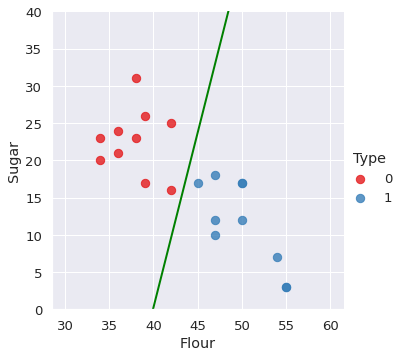

In [ ]:
#linear plot, hue->separate types of cake by color
sns.lmplot('Flour','Sugar', data=recipes, hue='Type',palette='Set1',fit_reg=False, scatter_kws={"s":70})
plt.plot(Flour_data,sugar_data,linewidth=2,color='green')
plt.ylim(0,40) #yaxis

FIT THE MODEL

In [ ]:
from sklearn import svm
# Fit the SVM model
svm_model= svm.SVC(kernel='linear')
svm_model.fit(x,y)

SVC(kernel='linear')

VISUALIZE RESULTS

In [ ]:
svm_theta_0 = svm_model.intercept_[0]
print('SVM theta 0 = {}'.format(svm_theta_0))

SVM theta 0 = -28.993497423663204


In [ ]:
svm_theta = svm_model.coef_[0]
print('SVM theta 1 = {}, theta 2 = {}'.format(svm_theta[0], svm_theta[1]))

SVM theta 1 = 0.666537262162451, theta 2 = -4.852668907809332e-05


In [ ]:
flour_line= np.linspace(30,60)
sugar_line = -(svm_theta_0 + svm_theta[0]*flour_line)/svm_theta[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

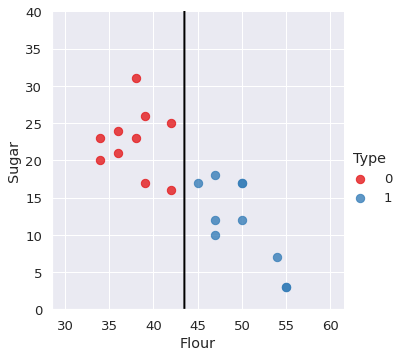

In [ ]:
#Plot the hyperplane
sns.lmplot('Flour','Sugar',data=recipes,hue='Type', palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(flour_line,sugar_line,linewidth=2,color='black')
plt.ylim(0,40) #yaxis

In [ ]:
svm_model.support_

array([11, 15,  3], dtype=int32)

In [ ]:
svm_model.support_vectors_

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

In [ ]:
svm_model.n_support_

array([2, 1], dtype=int32)

PREDICTING A NEW MODEL

In [ ]:
#Create a function to guess when a recipe is muffin or a cupcake
def muffin_or_cupcake(Flour, Sugar):
  if(svm_model.predict([[Flour, Sugar]]))==0:
    print('You\'re looking at a cupcake recipe!')
  else:
    print('You\'re looking at a muffin recipe!')

In [ ]:
#predict by giving values
muffin_or_cupcake(20,5)

You're looking at a cupcake recipe!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

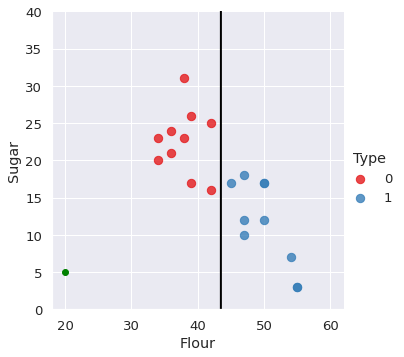

In [ ]:
#Plot to visually see where the plot lies
sns.lmplot('Flour','Sugar',data=recipes,hue='Type', palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(flour_line,sugar_line,linewidth=2,color='black')
plt.scatter(20,5,color='green')
plt.ylim(0,40) #yaxis